# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [237]:
# your code here
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
os.getcwd()
fitbit= pd.read_csv('../data/Fitbit2.csv')
fitbit.head()
fitbit.isna().sum()
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

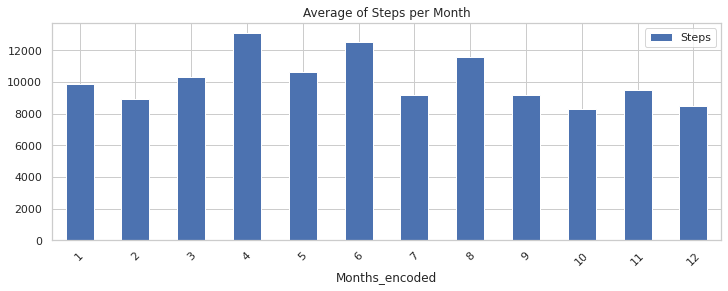

In [238]:
# AVERAGE STEPS BY MONTH_ENCODED
fitbit2 = fitbit.groupby("Months_encoded").agg({'Steps':'mean'}) 
img= fitbit2.plot(kind= 'bar', figsize=(12,4), title="Average of Steps per Month")
plt.xticks(rotation=45)
img.figure.savefig("../figures/img1.jpg", dpi=1000)

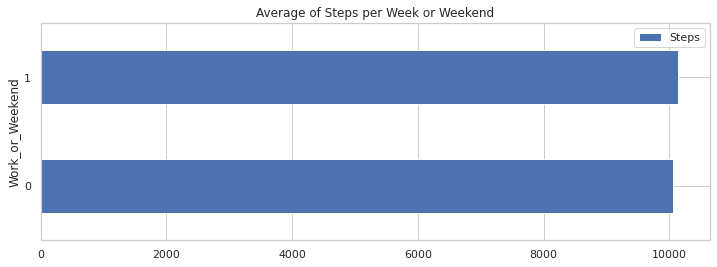

In [239]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
fitbit3 = fitbit.groupby("Work_or_Weekend").agg({'Steps':'mean'})
img2=fitbit3.plot.barh(figsize=(12,4), title="Average of Steps per Week or Weekend")
img2.figure.savefig("../figures/img2.jpg", dpi=1000)

,Steps,StepsMedian
Work_or_Weekend,,
0,10064.238095,10121.588556
1,10144.572519,10121.588556


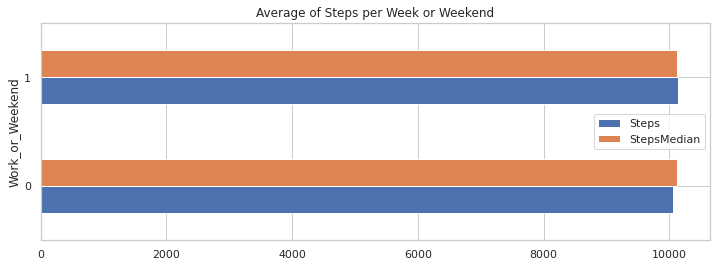

In [240]:
fitbit4 = fitbit.groupby("Work_or_Weekend").agg({'Steps':'mean'})
fitbit4['StepsMedian']= fitbit.Steps.mean()
display(fitbit4)
img3=fitbit4.plot.barh(figsize=(12,4), title="Average of Steps per Week or Weekend")
img3.figure.savefig("../figures/img3.jpg", dpi=1000)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

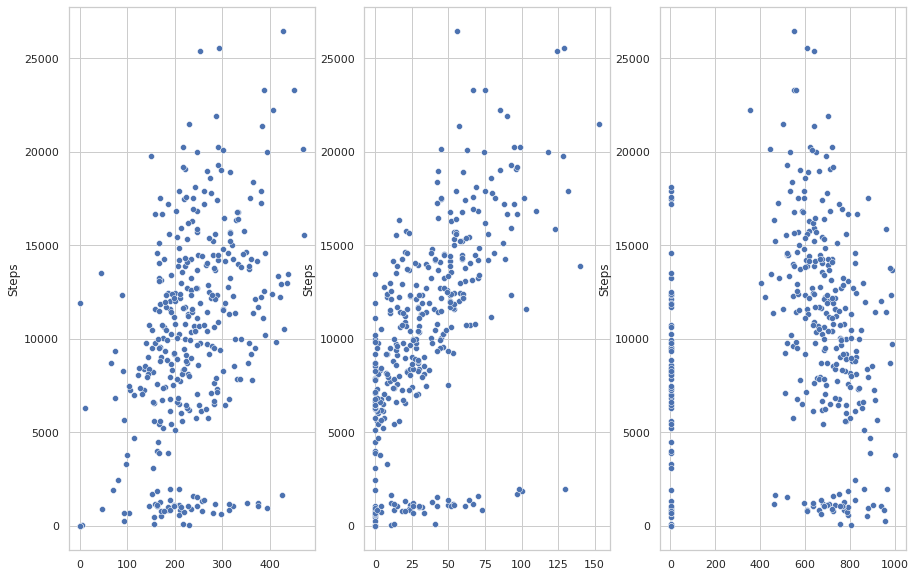

In [242]:
# your code here
MinutesL= list(fitbit['Minutes Lightly Active'])
MinutesV= list(fitbit['Minutes Very Active'])
MinutesS= list(fitbit['Minutes Sedentary'])
ListadeMinutes=[MinutesL,MinutesV,MinutesS]
Axes=0
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
for i in ListadeMinutes:
    img4=sns.scatterplot(x=i,y='Steps',ax=axs[Axes],data=fitbit)
    Axes+=1
    
img4.figure.savefig("../figures/img4.jpg", dpi=1000)

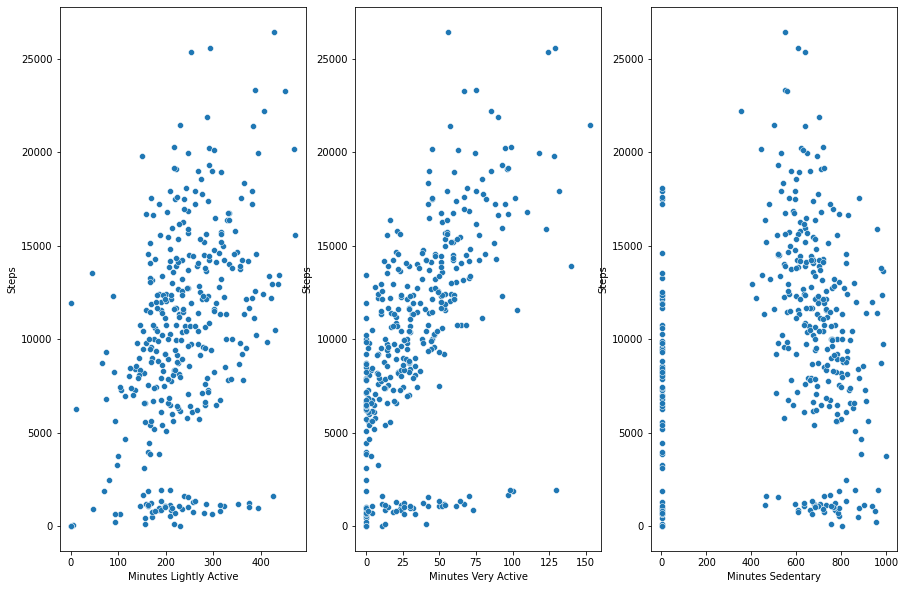

In [118]:
#No lo he conseguido hacer unicamente con Matplotlib. Lo voy a hacer con seaborn que he visto que otra gente es lo que ha usado
MinutesL= list(fitbit['Minutes Lightly Active'])
MinutesV= list(fitbit['Minutes Very Active'])
MinutesS= list(fitbit['Minutes Sedentary'])
ListadeMinutes=['Minutes Lightly Active','Minutes Very Active', 'Minutes Sedentary']
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,10))
for i in range(3):
    sns.scatterplot(x=ListadeMinutes[i],y='Steps',ax=axs[i],data=fitbit)
    

    

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [124]:
titanic= pd.read_csv('../data/titanic.csv')

In [136]:
# your code here
titanic.sample(32)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1220,1221,NaN,2,"Enander, Mr. Ingvar",male,21.000000,0,0,236854,13.0000,U0,S
1089,1090,NaN,2,"Baimbrigge, Mr. Charles Robert",male,23.000000,0,0,C.A. 31030,10.5000,U0,S
248,249,1.0,1,"Beckwith, Mr. Richard Leonard",male,37.000000,1,1,11751,52.5542,D35,S
945,946,NaN,2,"Mangiavacchi, Mr. Serafino Emilio",male,29.044058,0,0,SC/A.3 2861,15.5792,U0,C
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,48.098473,0,0,239853,0.0000,U0,S
148,149,0.0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.500000,0,2,230080,26.0000,F2,S
998,999,NaN,3,"Ryan, Mr. Edward",male,32.693417,0,0,383162,7.7500,U0,Q
367,368,1.0,3,"Moussa, Mrs. (Mantoura Boulos)",female,23.752237,0,0,2626,7.2292,U0,C
734,735,0.0,2,"Troupiansky, Mr. Moses Aaron",male,23.000000,0,0,233639,13.0000,U0,S
839,840,1.0,1,"Marechal, Mr. Pierre",male,46.914582,0,0,11774,29.7000,C47,C


#### Explore the titanic dataset using Pandas dtypes.

In [131]:
# your code here
titanic.info()
titanic2= pd.DataFrame(titanic)
titanic2.dtypes
titanic.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [132]:
# NUMERICAL VARIABLES

# your code here
numericas = titanic._get_numeric_data()
numericas.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [141]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('object')
Nuevo= titanic[['Survived', 'Pclass', 'SibSp','Parch','Embarked','Gender']]
Nuevo.head()

,Survived,Pclass,SibSp,Parch,Embarked,Gender
0,0.0,3,1,0,S,male
1,1.0,1,1,0,C,female
2,1.0,3,0,0,S,female
3,1.0,1,1,0,S,female
4,0.0,3,0,0,S,male


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [143]:
# your code here
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

#### Use the right visulalization to show the distribution of column `Age`.

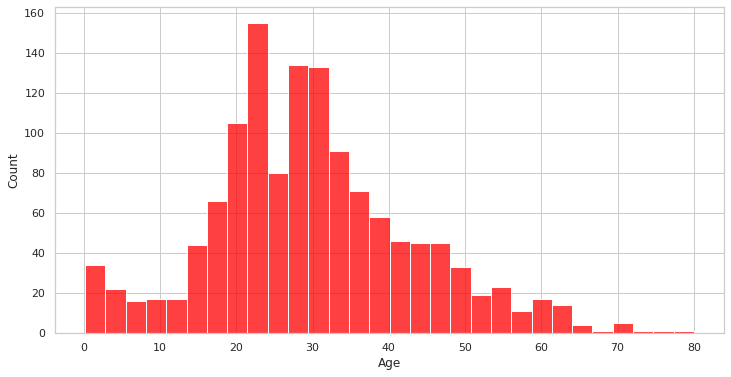

In [243]:
# your code here
img5= sns.histplot(x=titanic.Age,color='red')
img5.figure.savefig("../figures/img5.jpg", dpi=1000)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

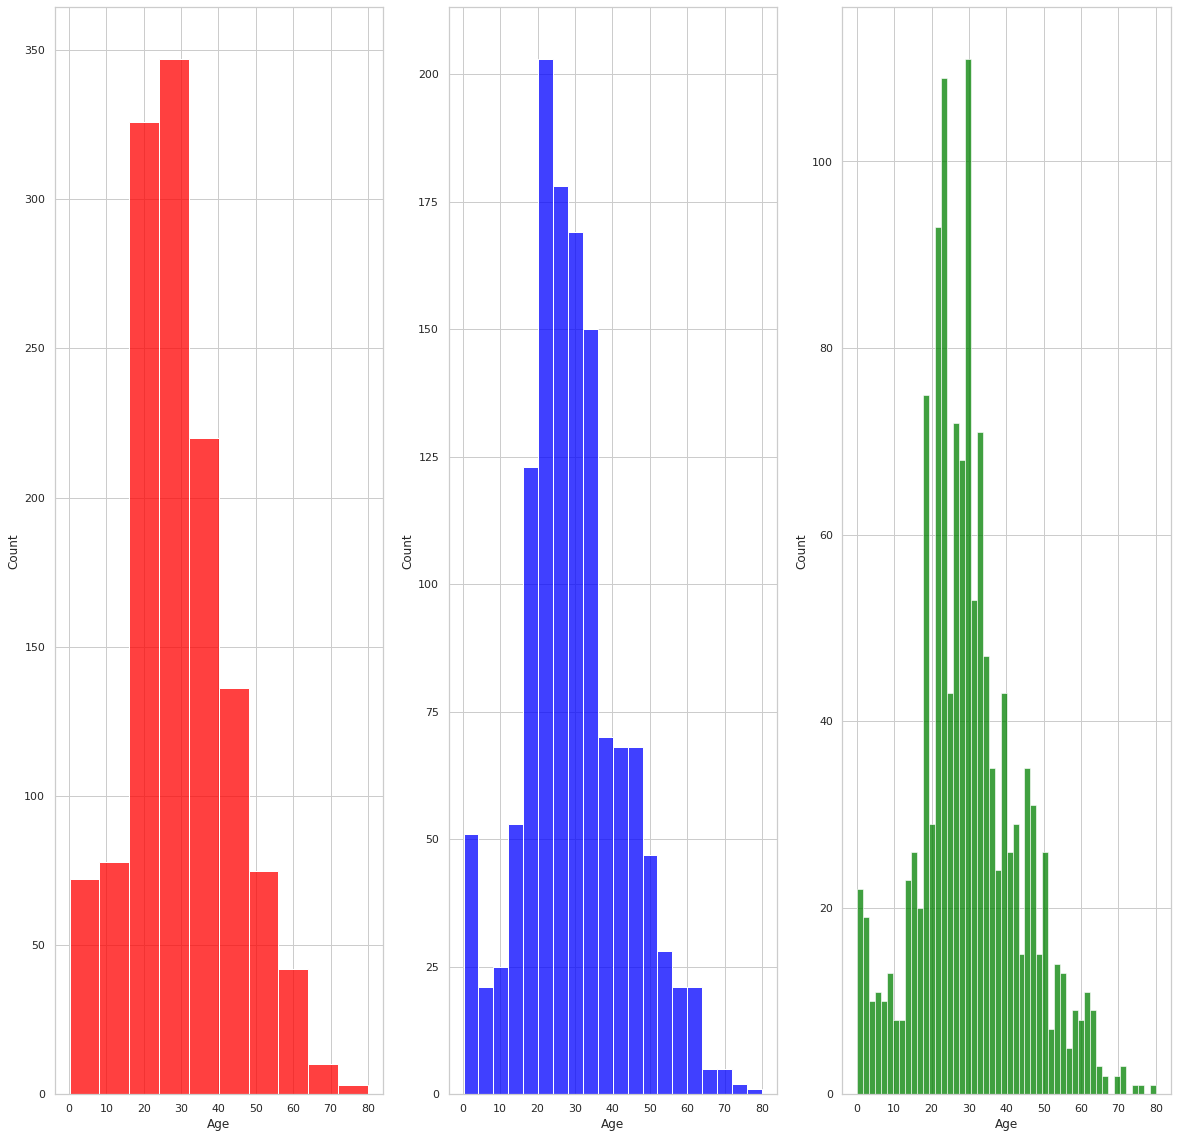

In [153]:
# your code here
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,20))
sns.histplot(data= titanic, x='Age',color='red',bins= 10, ax=axs[0])
sns.histplot(x=titanic.Age,color='blue',bins= 20, ax=axs[1])
sns.histplot(x=titanic.Age,color='green',bins= 50, ax=axs[2])


#### How does the bin size affect your plot?

In [ ]:
"""
your comments here

The bigger the bin, the smaller the number the age range per bar, and therefore, the bigger the number of columns.

"""

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

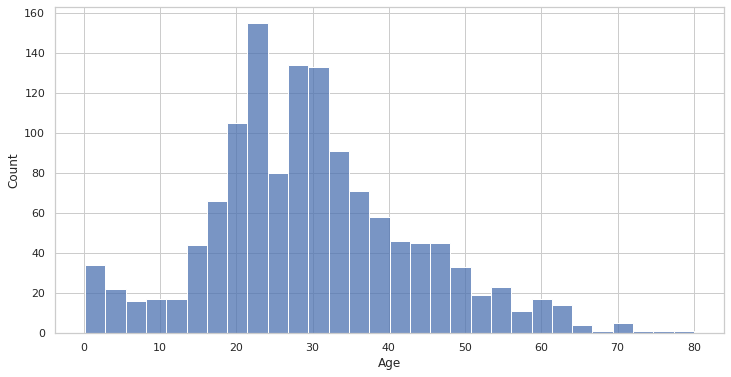

In [154]:
# your code here
sns.histplot(x=titanic.Age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:title={'center':'Frequency of Genders'}>

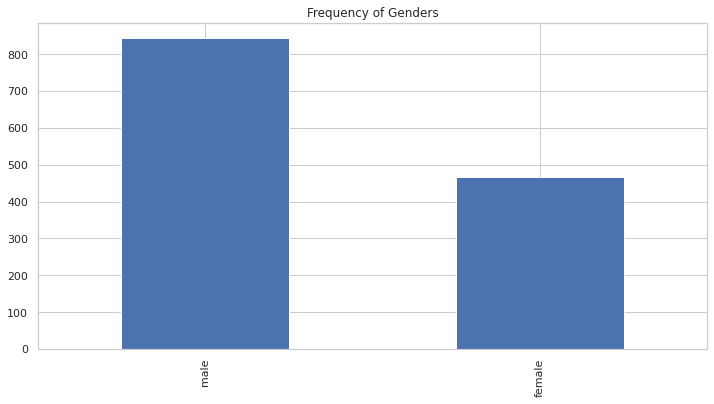

In [156]:
# Method 1 - matplotlib
titanic["Gender"].value_counts().plot(kind="bar", figsize=(12,6), title="Frequency of Genders")

# your code here

<AxesSubplot:xlabel='Gender', ylabel='count'>

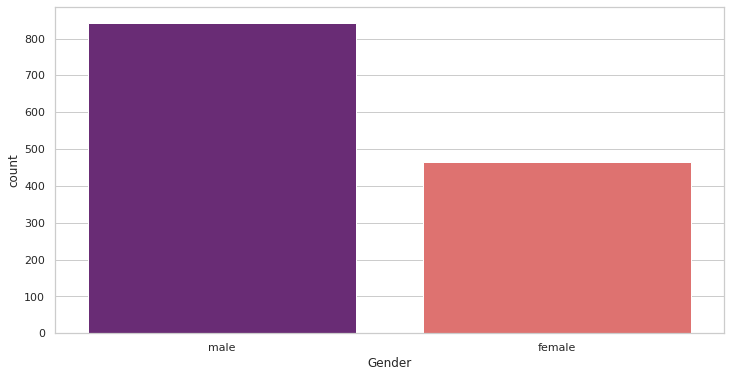

In [155]:
# Method 2 - seaborn
sns.countplot(x="Gender", data=titanic, palette="magma")
# your code here

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

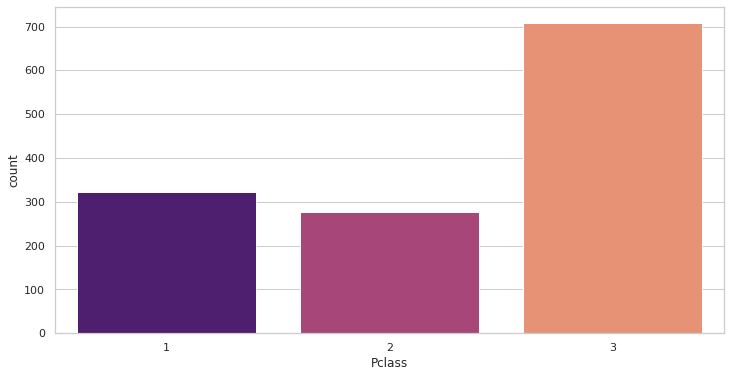

In [158]:
# your code here
sns.countplot(x="Pclass", data=titanic, palette="magma")

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

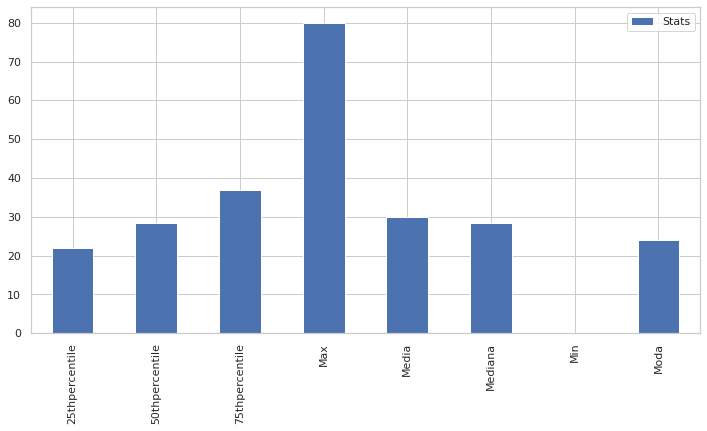

In [246]:
# your code here

Media= titanic.Age.mean()
Mediana= titanic.Age.median()
Moda= int(titanic.Age.mode())
titanic.Age.describe()
Min= titanic.Age.min()
The25= titanic.Age.quantile(0.25)
The50=titanic.Age.quantile(0.5)
The75=titanic.Age.quantile(0.75)
Max=titanic.Age.max()
Estatistical={'Stats':{'Media': Media, 'Mediana': Mediana, 'Moda': Moda, 'Min': Min , '25thpercentile':The25, '50thpercentile':The50, '75thpercentile': The75, 'Max':Max}}
Estadistic= pd.DataFrame.from_dict(Estatistical)
img6= Estadistic.plot(kind='bar')
img6.figure.savefig("../figures/img6.jpg", dpi=1000)

In [ ]:
"""
Esto me ha costado la vida aunque fuese relativamente sencillo. Seguro que había una manera más raapida de hacerlo pero no la sé. También, se que se podía hacer pintando líneas en la distribución, pero eso es copiar los apuntes de Ras, asi que no se, he intentado hacer esto.
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Que la mayoría de los datos se encuentran en una zona de sitribución similar( entre el 25 y 75 por ciento), siendo tanto el máximo como el mínimo claro outliers.
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

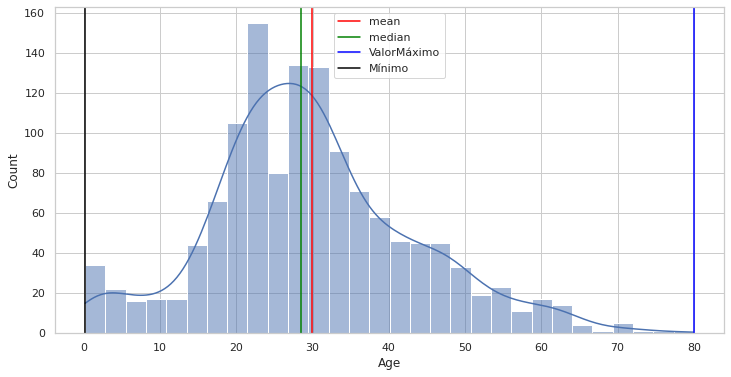

In [244]:
# your code here
graf = sns.histplot(x=titanic.Age, kde=True)
graf.axvline(x=titanic.Age.mean(), c="red", label="mean") 
graf.axvline(x=titanic.Age.median(), c="green", label="median")
graf.axvline(x=titanic.Age.max(), c="blue", label="ValorMáximo") 
graf.axvline(x=titanic.Age.min(), c="black", label="Mínimo")
plt.legend();
graf.figure.savefig("../figures/graf.jpg", dpi=1000)

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Bueno, obtenemos la línea de kde, y además visualmente se aprecia mejor dónde y como se acumulan los datos.
your comments here

"""

<AxesSubplot:xlabel='Age'>

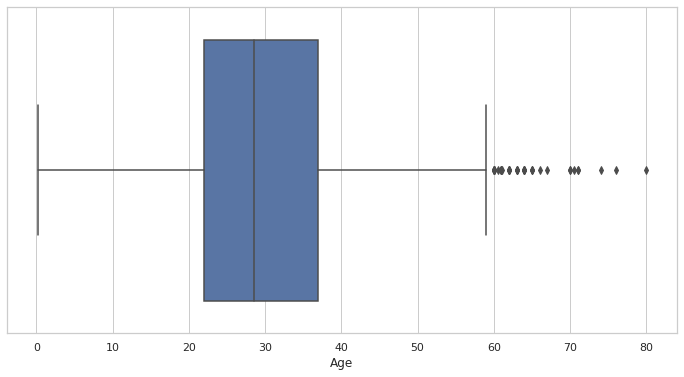

In [216]:
sns.boxplot(x="Age", data=titanic) #También está bien para ver la distribución

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

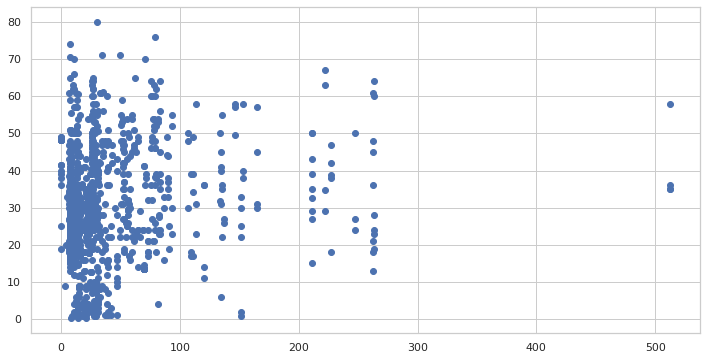

In [219]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Fare, y=titanic.Age)
# your code here

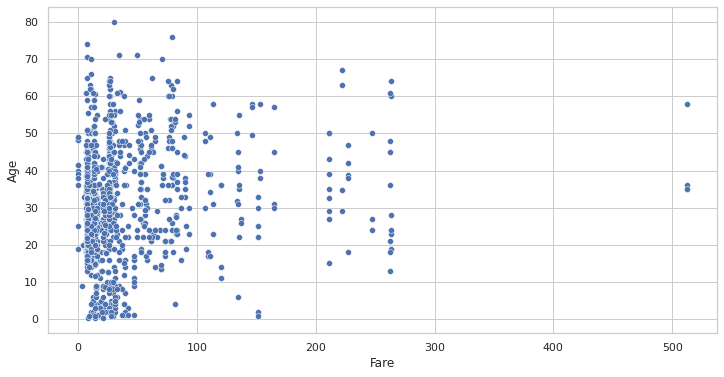

In [220]:
# Method 2 - seaborn
sns.scatterplot(x="Fare", y="Age", data=titanic);
# your code here

#### Plot the correlation matrix using seaborn.

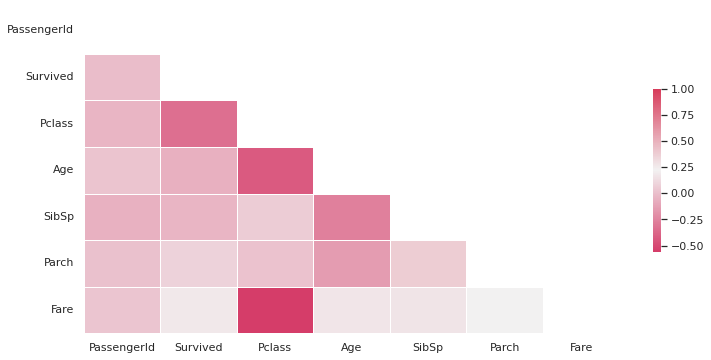

In [223]:
# your code here
corr = titanic.corr()
corr
mascara = np.triu(np.ones_like(corr, dtype=bool))
color_map = sns.diverging_palette(0, 5, as_cmap=True)
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=False, 
            linewidth=0.5, 
            vmax=1,
            cbar_kws={"shrink": .5}
);

#### What are the most correlated features?

In [224]:
#Pues para empezar las correlaciones más altas son las negativas, y es entre Fare y Pclass, aunque Pclass sea una categoórica a la que se le conceden valor.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

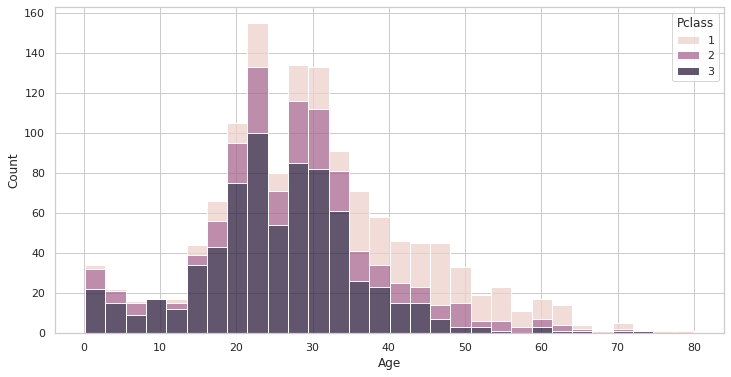

In [230]:
# your code here
sns.histplot(data=titanic, x="Age", hue="Pclass", multiple="stack")

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

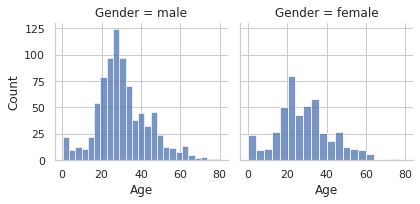

In [245]:
# your code 
última= sns.FacetGrid(titanic, col='Gender')
última.map_dataframe(sns.histplot, x='Age')
última.figure.savefig("../figures/graph2.jpg", dpi=1000)